# Data Analysis Project: Brazilian E-Commerce Public Dataset by Olist
This dataset is provided by Olist, Brazilian largest e-commerce company that facilitates small businesses. Olist acts as a link between small shops and various marketplaces, making it easier for them to sell products online. The products sold are shipped directly from the stores to the consumers through Olist's logistics partners. For more on this dataset, visit kaggle at [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/).

- **Nama:** Naurahhana Firdaustsabita F P P
- **Email:** naurahhanaffpp@gmail.com
- **ID Dicoding:** naurahhanafp

## Defining Business Questions
The focus of the data analysis carried out in this project is **analyzing Olist's delivery orders performance** so that only 2 datasets are used, namely *olist_orders_dataset.csv* and *olist_order_reviews_dataset.csv*. The business questions formulated for this data analysis are:
1. What is the annual trend in order volume for Olist?
2. How has Olist's order delivery performance evolved over the years?
3. What percentage of Olist orders are delivered on time?
4. Is there a correlation between order delivery status and customer review ratings?

## Import the Packages/Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
The datasets used are *olist_orders_dataset.csv* and *olist_order_reviews_dataset.csv*.

#### Load orders datase

In [2]:
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- We can see how the number of orders changes over time by looking at the *order_id* column based on the *order_purchase_timestamp*.
- We can figure out which orders were late or on time by comparing the *order_estimated_delivery_date* to the actual *order_delivered_customer_date*.

#### Load order reviews dataset

In [3]:
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:** 

We can find the **relationship between order arrivals and customer reviews** using the *df_orders* and *df_review* tables.

### Assessing Data
Assess the *df_orders* and *df_reviews* data by looking at the data type, duplication, and number of null values.

#### Assesing df_orders

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [29]:
print("Duplicates: ", df_orders.duplicated().sum())
df_orders.isna().sum()

Duplicates:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_purchase_day                  0
order_purchase_date                 0
order_purchase_month                0
order_purchase_year                 0
order_purchase_time                 0
delivery_status                     0
dtype: int64

**Insight:**
- The data type of the columns *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date* should be **datetime**.
- There is a column that is **null** because it is adjusted by *order_status*

#### Assesing df_reviews

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
print("Duplicates: ", df_reviews.duplicated().sum())
df_reviews.isna().sum()

Duplicates:  0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight**
- The *review_creation_date* and *review_answer_timestamp* columns should be of type **datetime**.
- Not all customers leave comments for reviews.

### Cleaning Data
We will do the data cleaning according to assesing data that has been done.

#### Cleaning df_orders
Change the data type for *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date* column to **datetime**

In [8]:
datetime_columns_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
df_orders[datetime_columns_orders] = df_orders[datetime_columns_orders].apply(pd.to_datetime)

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning data df_reviews
Change the data type for *review_creation_date* dan *review_answer_timestamp* column to **datetime**

In [9]:
datetime_columns_reviews = ["review_creation_date", "review_answer_timestamp"]
df_reviews[datetime_columns_reviews] = df_reviews[datetime_columns_reviews].apply(pd.to_datetime)

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### df_orders exploration

In [10]:
df_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


View order trends by creating columns for day, date, month, year, and time from the *order_purchase_timestamp* column.

In [11]:
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].dt.day_name()           # Day of week
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].dt.day                 # Date
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.month_name()       # Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.year                # Year
df_orders['order_purchase_time'] = df_orders['order_purchase_timestamp'].dt.time                # Time

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39


Create a pivot table to view the number of orders by year.

In [12]:
df_orders.groupby(by="order_purchase_year").agg({
    "order_id" : "nunique"
})

,order_id
order_purchase_year,
2016,329
2017,45101
2018,54011


Create a pivot table to view the number of orders by month and year.

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_orders['order_purchase_month'] = pd.Categorical(df_orders['order_purchase_month'], categories=month_order, ordered=True)

df_orders.groupby(by=["order_purchase_year", "order_purchase_month"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .query('order_id > 0')

,order_purchase_year,order_purchase_month,order_id
8,2016,September,4
9,2016,October,324
11,2016,December,1
12,2017,January,800
13,2017,February,1780
14,2017,March,2682
15,2017,April,2404
16,2017,May,3700
17,2017,June,3245
18,2017,July,4026


In order to keep the data consistent, the data to be analyzed is from January 2017 to August 2018.

Create a pivot table to view many orders based on their status.

In [14]:
df_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Create a new delivery_status column to contain late and on-time statuses by calculating the *order_estimated_delivery_date* column with the *order_delivered_customer_date* column.

In [15]:
delivery_status = (df_orders["order_estimated_delivery_date"] - df_orders["order_delivered_customer_date"]).dt.days
df_orders['delivery_status'] = delivery_status.apply(lambda x: 'On Time' if x > 0 else 'Late')

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39,On Time


Create a pivot table to view many orders based on delivery status.

In [16]:
df_orders.groupby(by="delivery_status").agg({
    "order_id" : "nunique"
})

,order_id
delivery_status,
Late,12254
On Time,87187


**Insight:**
- Every year, the orders are increasing with 54,011 orders in 2018.
- The delivered status is the highest delivery status.
- There were 12,254 orders that experienced delays.

### df_reviews exploration

In [17]:
df_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Create a pivot table to view the number of orders based on review score.

In [18]:
df_reviews.groupby(by="review_score").agg({
    "order_id" : "nunique"
})

,order_id
review_score,
1,11393
2,3148
3,8160
4,19098
5,57076


**Insight:**
To see the relationship between review rating (review_score) and order arrival status (delivery_status), we need to combine *df_orders* and *df_reviews*.

### df_orders and df_reviews exploration

Merge *df_orders* and *df_reviews*.

In [19]:
df_order_review = pd.merge(
    left=df_orders,
    right=df_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df_order_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time,delivery_status,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33,On Time,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37,On Time,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49,On Time,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06,On Time,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39,On Time,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


Filter for *df_order_review* based on *df_year_month_orders* so that the data is consistent. The data to be analyzed is data from January 2017 to August 2018.

In [20]:
df_order_review_filtered = df_order_review[
    ((df_order_review['order_purchase_year'] == 2017) & (df_order_review['order_purchase_month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))) |
    ((df_order_review['order_purchase_year'] == 2018) & (df_order_review['order_purchase_month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])))
]
df_order_review_filtered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time,delivery_status,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33,On Time,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37,On Time,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49,On Time,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06,On Time,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39,On Time,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


Create a pivot table to view the number of orders based on delivery status and review rating.

In [21]:
df_order_review_filtered.groupby(by=["review_score", "delivery_status"]).agg({
    "order_id" : "nunique"
})

order_id
review_score delivery_status          
1.0          Late                 5601
             On Time              5692
2.0          Late                  861
             On Time              2275
3.0          Late                 1239
             On Time              6898
4.0          Late                 1440
             On Time             17606
5.0          Late                 2772
             On Time             54148

**Insight:**
- There are 54,148 review orders with a score of 5 
- Late delivery status has an impact on review score.

## Visualization & Explanatory Analysis

### Question 1: What is the annual trend in order volume for Olist?
Create a new dataframe to load the information of total orders by order month and year from the *df_order_review_filtered* dataframe.

In [22]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_order_review_filtered['order_purchase_month'] = pd.Categorical(df_order_review_filtered['order_purchase_month'], categories=month_order, ordered=True)

df_year_month_order = df_order_review_filtered.groupby(by=["order_purchase_year", "order_purchase_month"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .rename(columns={"order_id": "order_count"}) \
    .query('order_count > 0')

df_year_month_order

C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_8504\736237272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_review_filtered['order_purchase_month'] = pd.Categorical(df_order_review_filtered['order_purchase_month'], categories=month_order, ordered=True)


,order_purchase_year,order_purchase_month,order_count
0,2017,January,800
1,2017,February,1780
2,2017,March,2682
3,2017,April,2404
4,2017,May,3700
5,2017,June,3245
6,2017,July,4026
7,2017,August,4331
8,2017,September,4285
9,2017,October,4631


Create a line chart based on the year using the *seaborn* library.

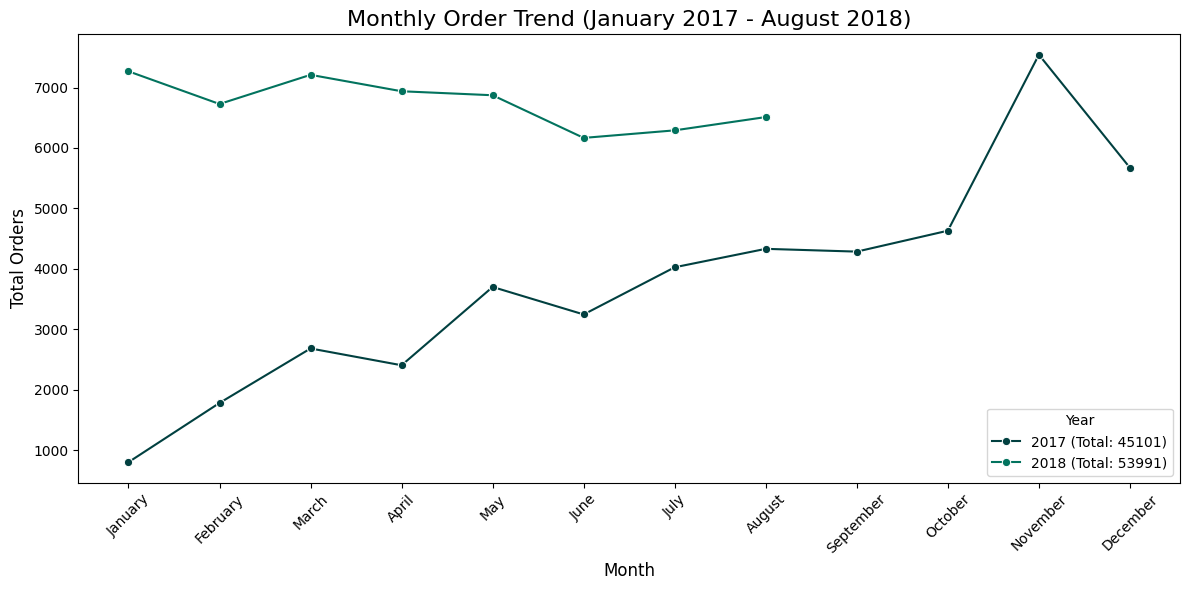

In [32]:
# Calculating total orders for each year
total_orders_2017 = df_year_month_order[df_year_month_order["order_purchase_year"] == 2017]["order_count"].sum()
total_orders_2018 = df_year_month_order[df_year_month_order["order_purchase_year"] == 2018]["order_count"].sum()

plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    x="order_purchase_month",   
    y="order_count",
    hue="order_purchase_year",
    data=df_year_month_order, 
    marker="o", 
    palette=["#014040", "#02735E"]
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles, # graphical objects from the legend (for example, lines).
    labels=[f"2017 (Total: {total_orders_2017})", f"2018 (Total: {total_orders_2018})"], 
    title="Year"
)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.title("Monthly Order Trend (January 2017 - August 2018)", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
The total number of orders in 2018 (53,991) was higher than in 2017 (45,101).

### Question 2: How has Olist's order delivery performance evolved over the years?
Create a new dataframe to load the order delivery status from *df_order_review_filtered*.

In [24]:
df_delivery_performa = df_order_review_filtered.groupby(by=["order_purchase_year", "order_purchase_month", "delivery_status"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .rename(columns={"order_id": "order_count"}) \
    .query('order_count > 0')

df_delivery_performa

,order_purchase_year,order_purchase_month,delivery_status,order_count
0,2017,January,Late,73
1,2017,January,On Time,727
2,2017,February,Late,183
3,2017,February,On Time,1597
4,2017,March,Late,293
5,2017,March,On Time,2389
6,2017,April,Late,306
7,2017,April,On Time,2098
8,2017,May,Late,305
9,2017,May,On Time,3395


Membuat 2 canvas untuk tahun 2017 dan 2018

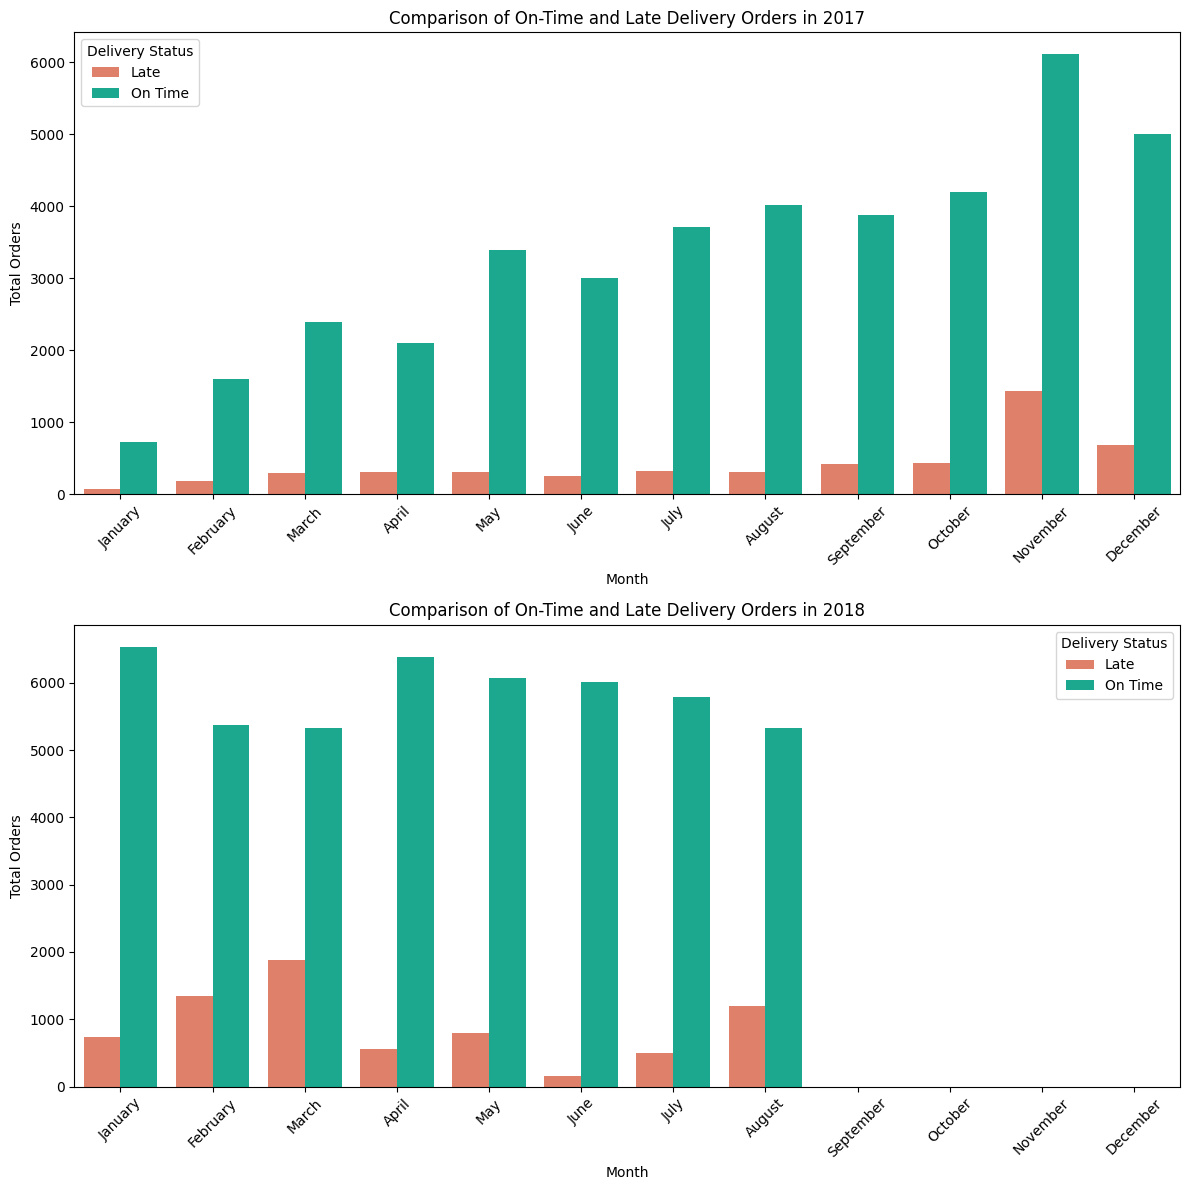

In [33]:
plt.figure(figsize=(12, 12))

# Create subplots for each year
for year in df_delivery_performa["order_purchase_year"].unique():
    # create two rows of subplots
    plt.subplot(2, 1, year - 2016) # plt.subplot(nrows, ncols, index)
    sns.barplot(data=df_delivery_performa[df_delivery_performa["order_purchase_year"] == year], 
                 x="order_purchase_month", 
                 y="order_count", 
                 hue="delivery_status", 
                 palette=["#F27457", "#04BF9D"])
    
    plt.title(f"Comparison of On-Time and Late Delivery Orders in {year}")
    plt.xlabel("Month")
    plt.ylabel("Total Orders")
    plt.xticks(rotation=45)
    plt.legend(title="Delivery Status")

# Adjust layout
plt.tight_layout()
plt.show()

**Insight:** There are more late order shipments in 2018.

### Question 3: What percentage of Olist orders are delivered on time?
Create a pie chart to find out the percentage of orders based on delivery status with the *matplotlib* library using *df_delivery_performa*.

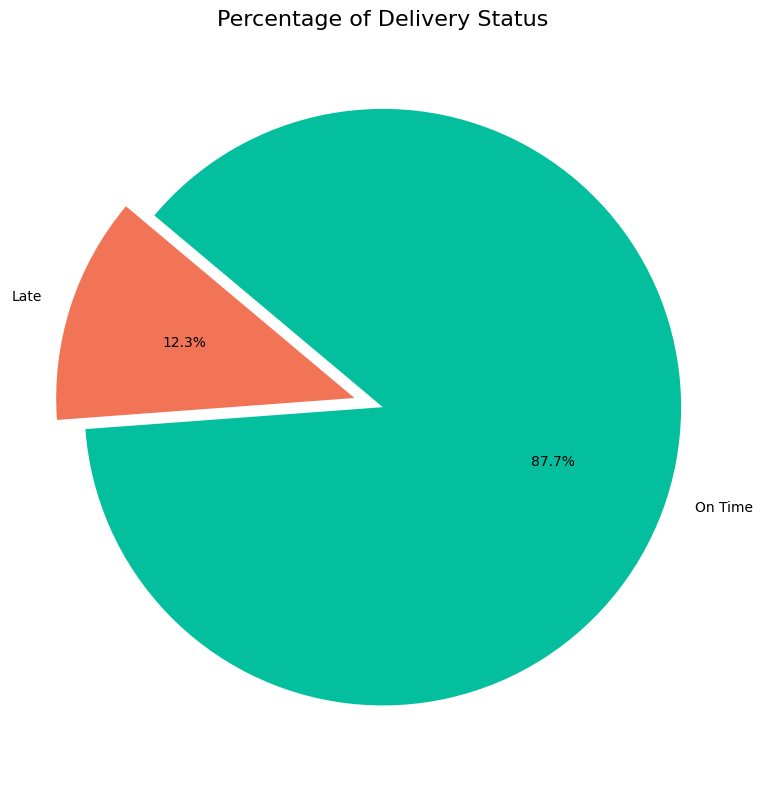

In [34]:
# Create a dataframe to load the delivery_status count based on order_count
df_delivery_presentase = df_delivery_performa.groupby('delivery_status')['order_count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    df_delivery_presentase, 
    explode= (0.1, 0) , 
    labels= df_delivery_presentase.index, 
    colors= ["#F27457", "#04BF9D"], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Percentage of Delivery Status", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:** There are 12.3% late delivery of orders.

### Question 4: Is there a correlation between order delivery status and customer review ratings?
Create a new dataframe to load multiple orders based on delivery status and review rating from *df_order_review_filtered*.

In [27]:
df_order_score = df_order_review_filtered.groupby(by=["review_score", "delivery_status"]).agg({
    "order_id" : "nunique"
})
df_order_score.rename(columns={
    "order_id": "order_count"
}, inplace=True)
df_order_score = df_order_score.reset_index()
df_order_score

,review_score,delivery_status,order_count
0,1.0,Late,5601
1,1.0,On Time,5692
2,2.0,Late,861
3,2.0,On Time,2275
4,3.0,Late,1239
5,3.0,On Time,6898
6,4.0,Late,1440
7,4.0,On Time,17606
8,5.0,Late,2772
9,5.0,On Time,54148


Create a bar chart using the *seaborn* library.

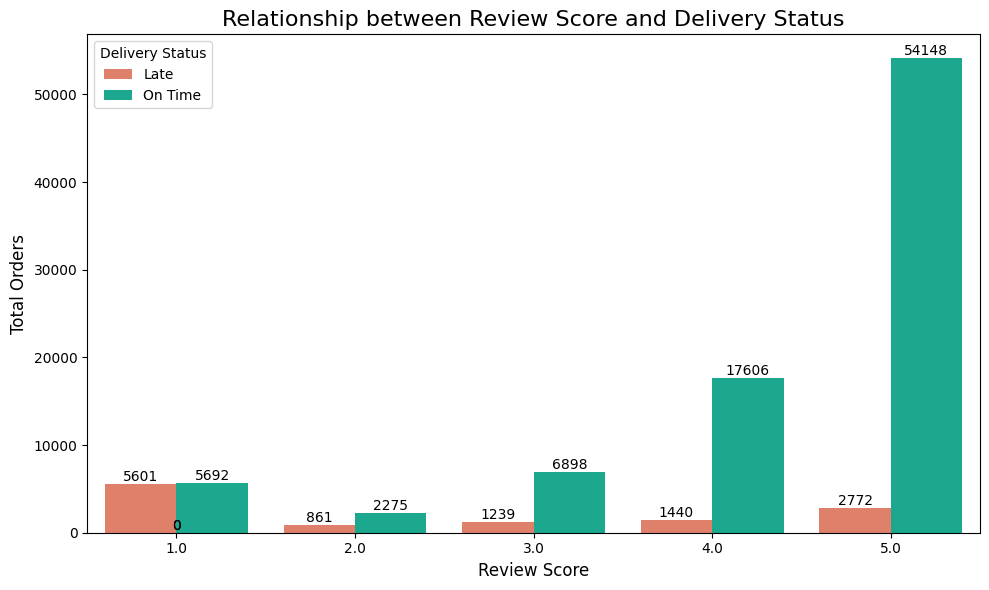

In [35]:
# Creating a grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="review_score", 
    y="order_count", 
    hue="delivery_status", 
    data=df_order_score,
    palette=["#F27457", "#04BF9D"]  
)

# Add a laber for each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(
        f"{int(height)}",  
        (patch.get_x() + patch.get_width() / 2, height),  # Position
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=10
    )
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.title("Relationship between Review Score and Delivery Status", fontsize=16)
plt.legend(title="Delivery Status")
plt.tight_layout()
plt.show()


**Insight:** There are 53,297 reviews with 5 score for ontime delivery. However, there are 5,661 reviews with 1 score for late delivery which is not much different from the total 5,732 reviews with 1 score for on-time delivery.

## Conclusion

1. **Conclution question 1:  What is the annual trend in order volume for Olist?**

In general, the business experienced growth from 2017 to 2018, indicated by an increase in the total number of orders.

2. **Conclution question 2: How has Olist's order delivery performance evolved over the years?**

The number of on-time deliveries dominated over late deliveries in both 2017 and 2018. As the number of orders increased in 2018, the number of late deliveries also increased in 2018.

3. **Conclution question 3: What percentage of Olist orders are delivered on time?**

This can be seen from the percentage of on-time deliveries reaching 87.7%. Although the percentage is smaller, at 12.3%, the presence of late deliveries still needs to be a concern. Late deliveries can be a cause of customer dissatisfaction and potentially damage the company's reputation. But overall, the product delivery performance was quite good.   

4. **Conclution question 4: Is there a correlation between order delivery status and customer review ratings?**

Yes, delivery status can affect the review score for an order. There are 53,297 reviews worth 5 for on-time delivery. However, there are 5,661 reviews with 1 score for late delivery which is not much different from the total 5,732 reviews worth 1 for on-time delivery. Customers can write comments for each review given. To find out other factors that affect the review score of each order, we need to pay attention to the comments especially when getting a low review score. This aims to optimize delivery time.